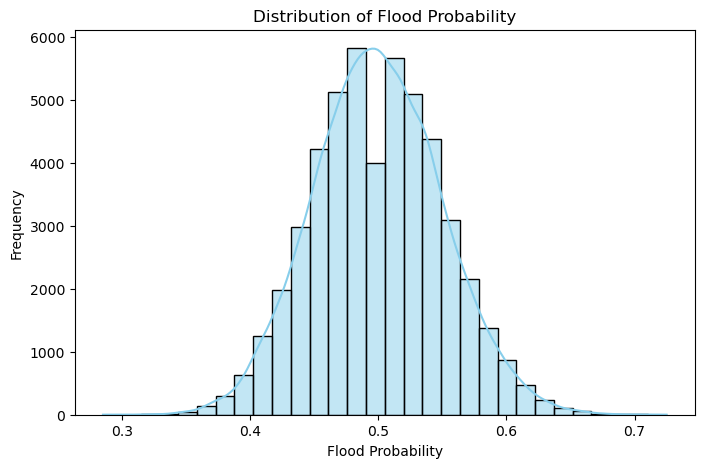

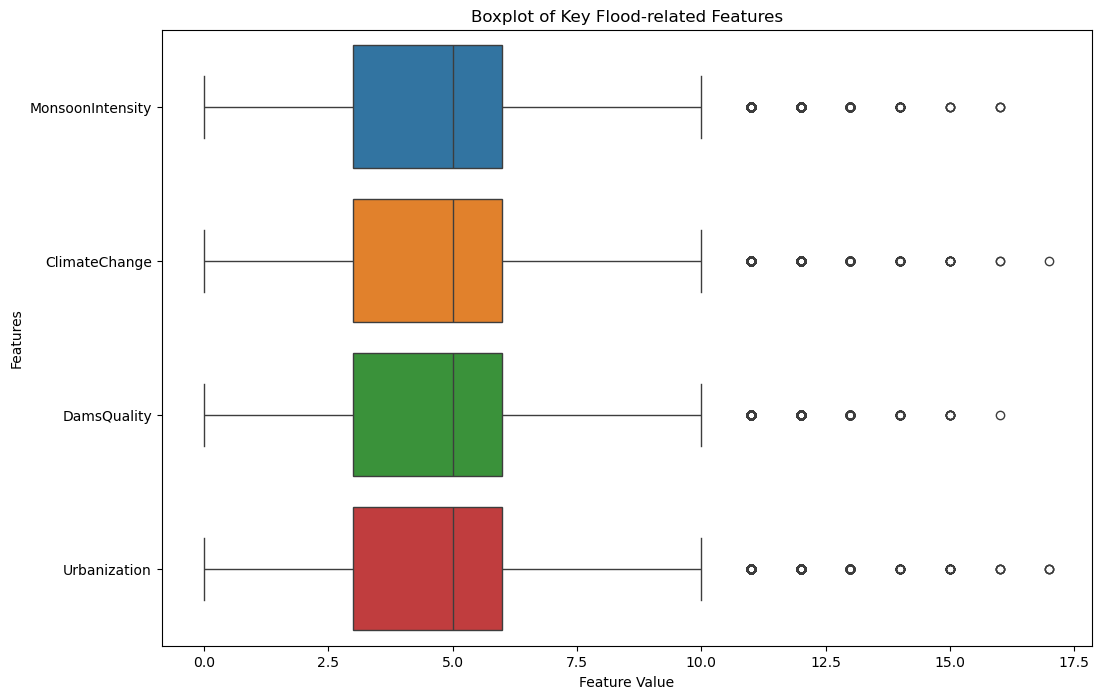

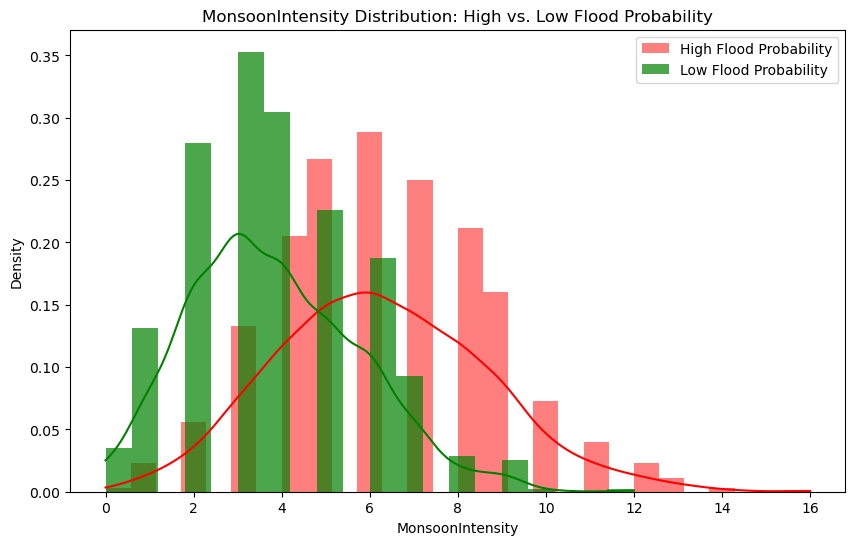

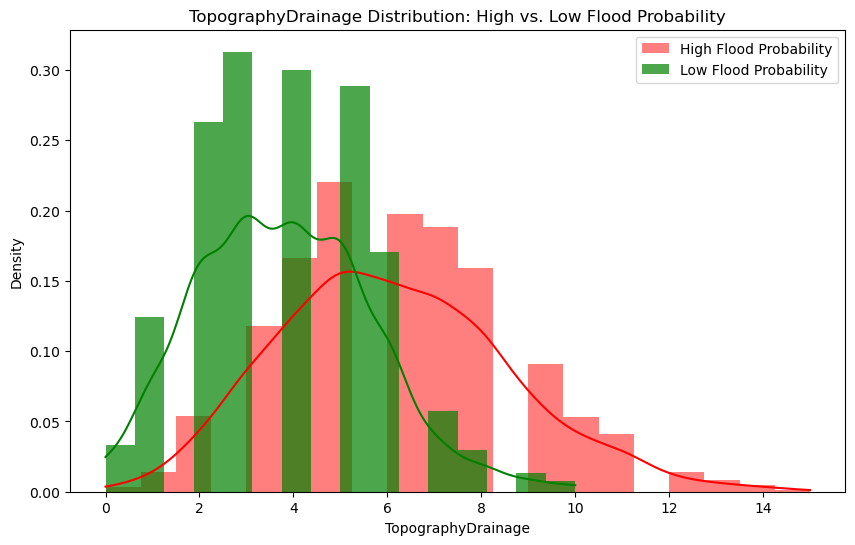

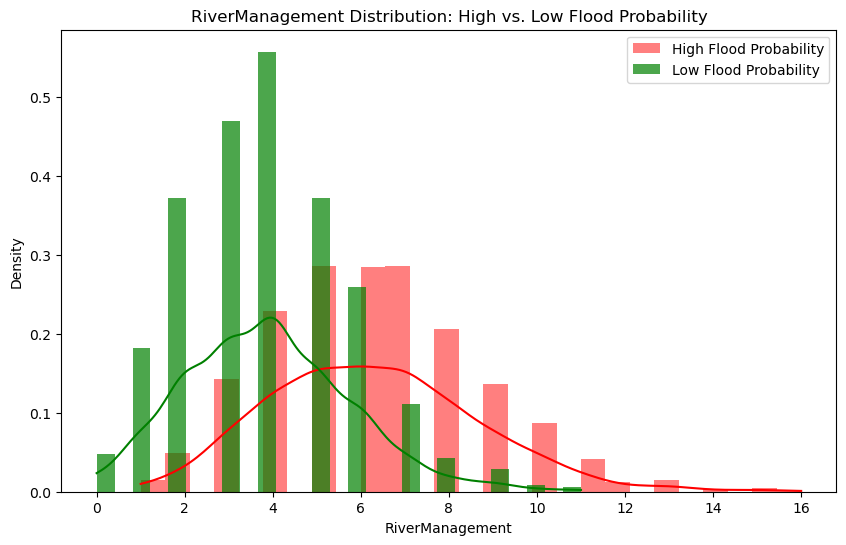

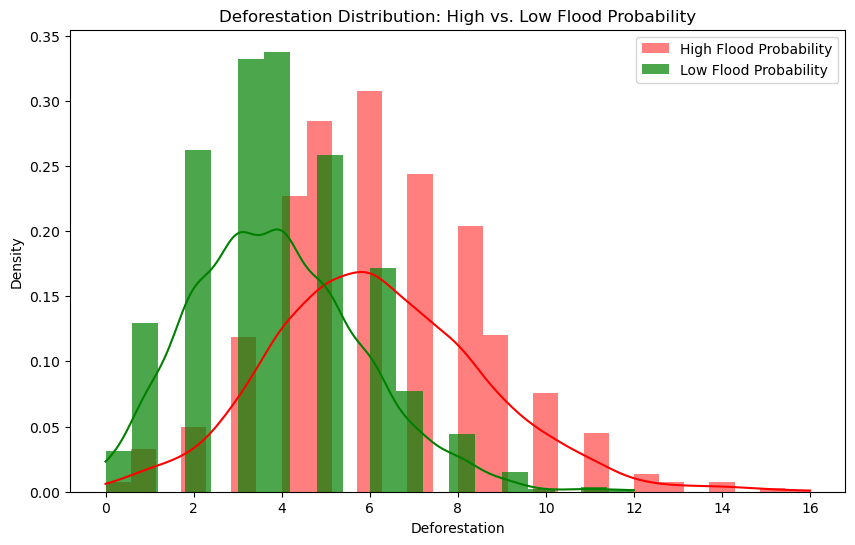

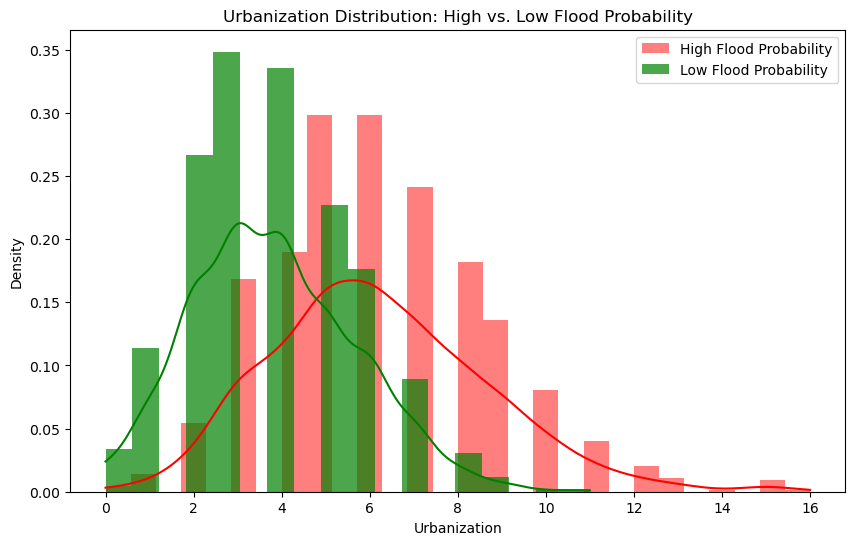

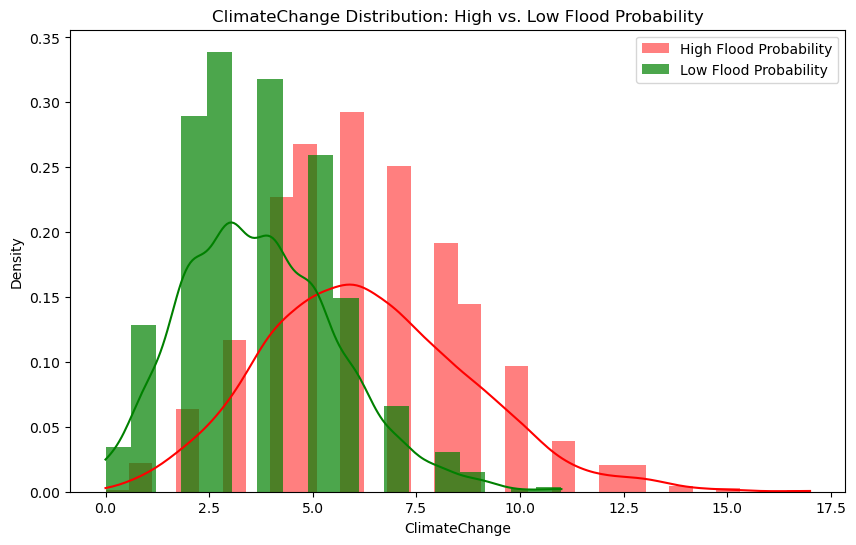

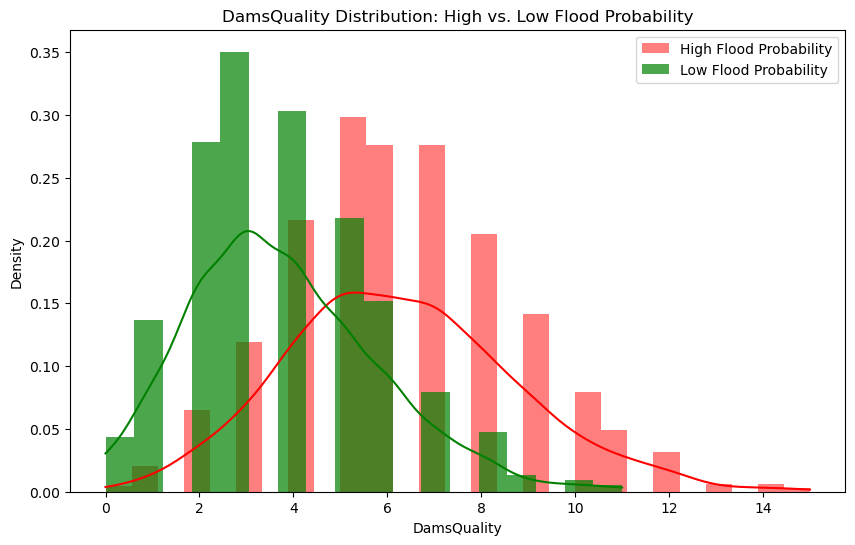

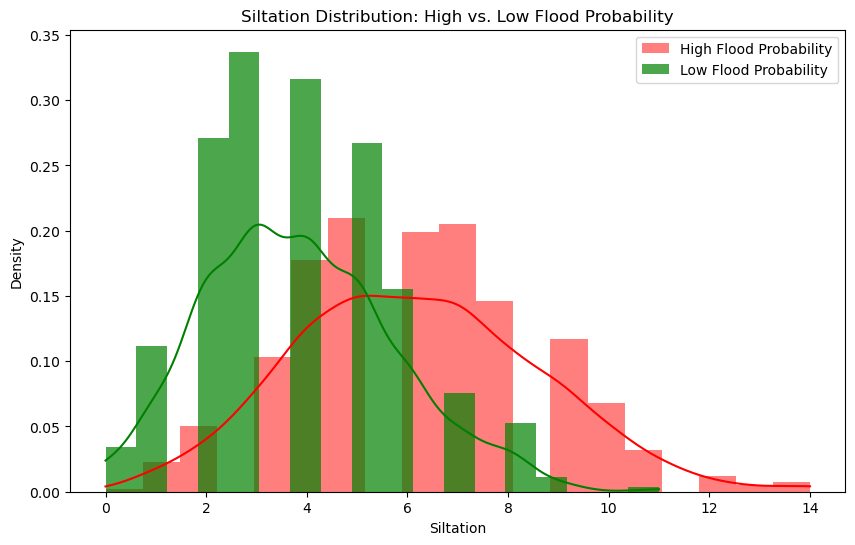

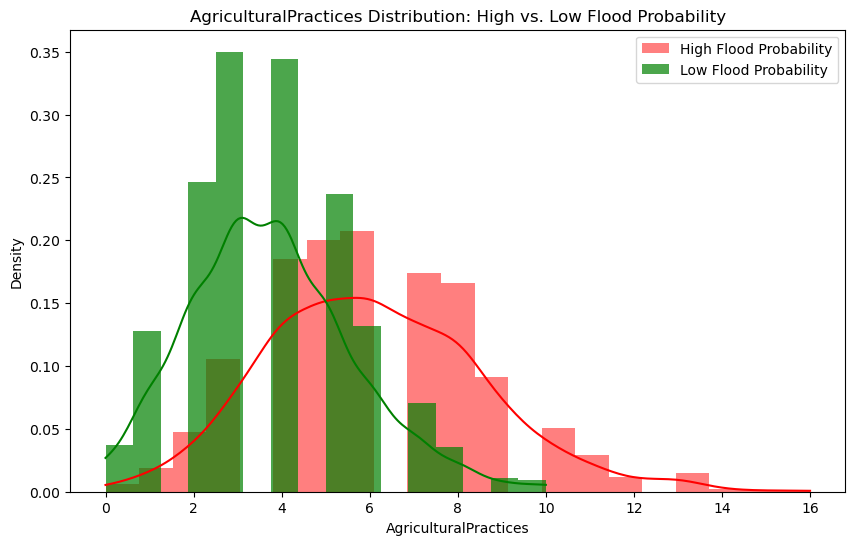

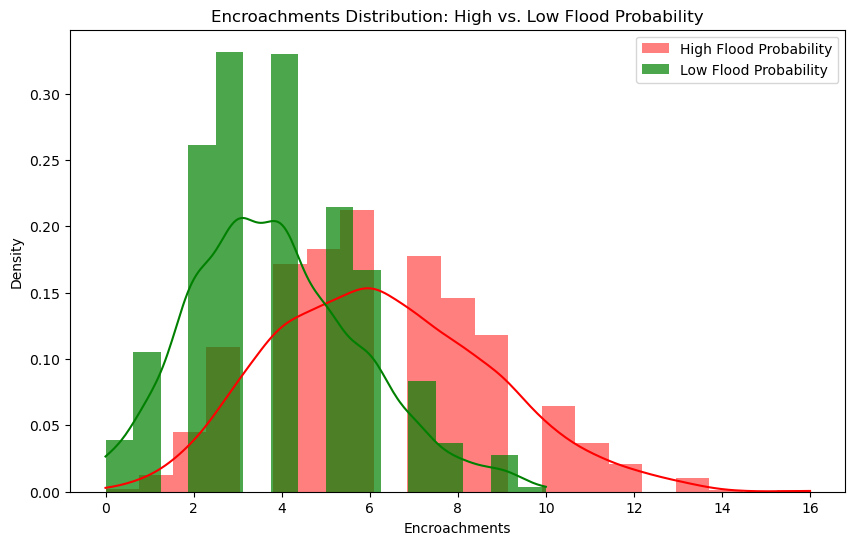

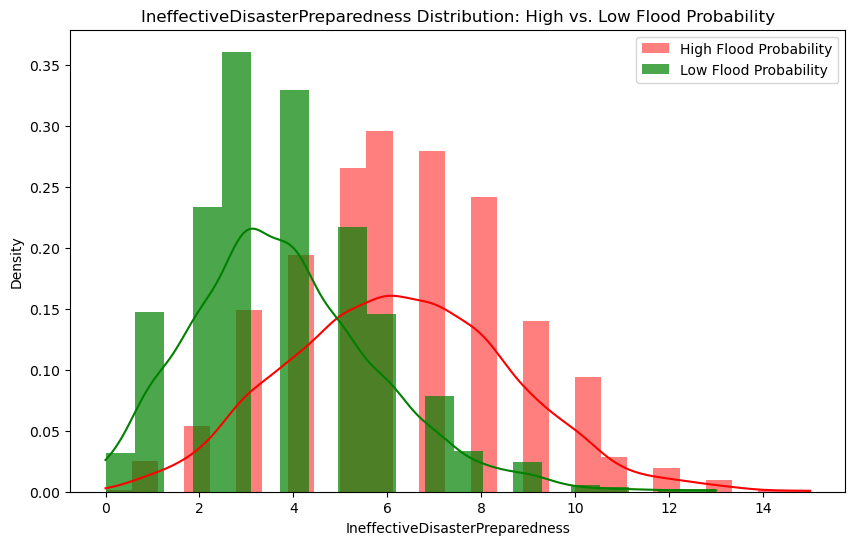

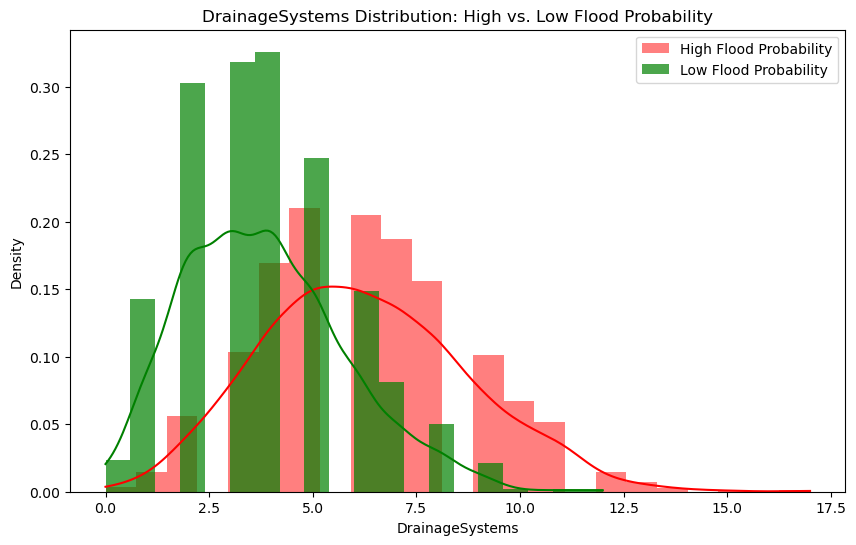

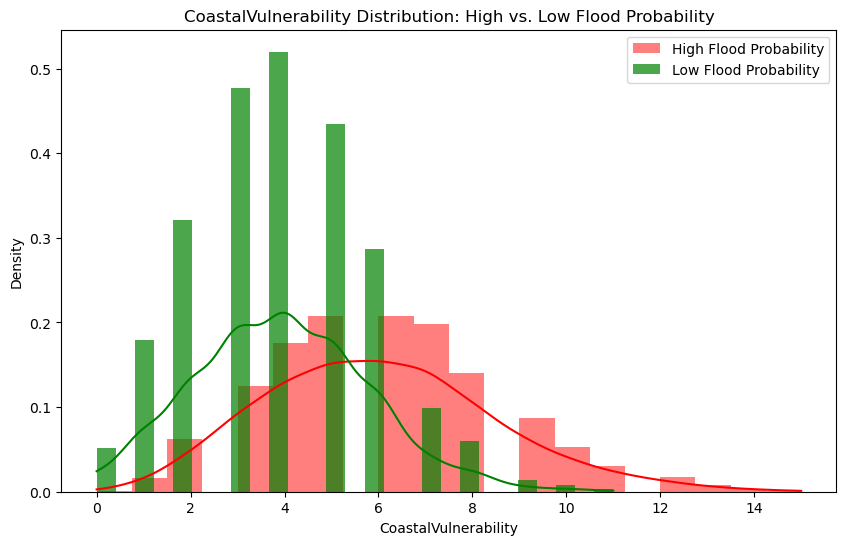

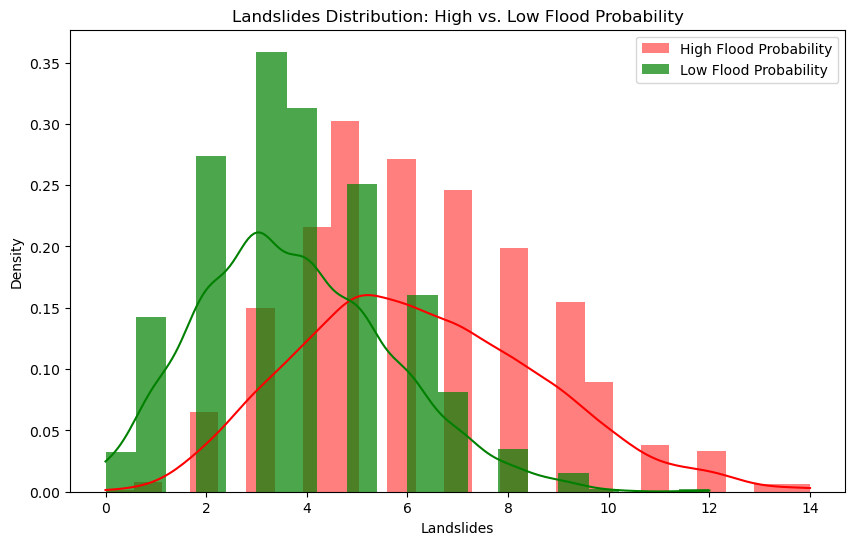

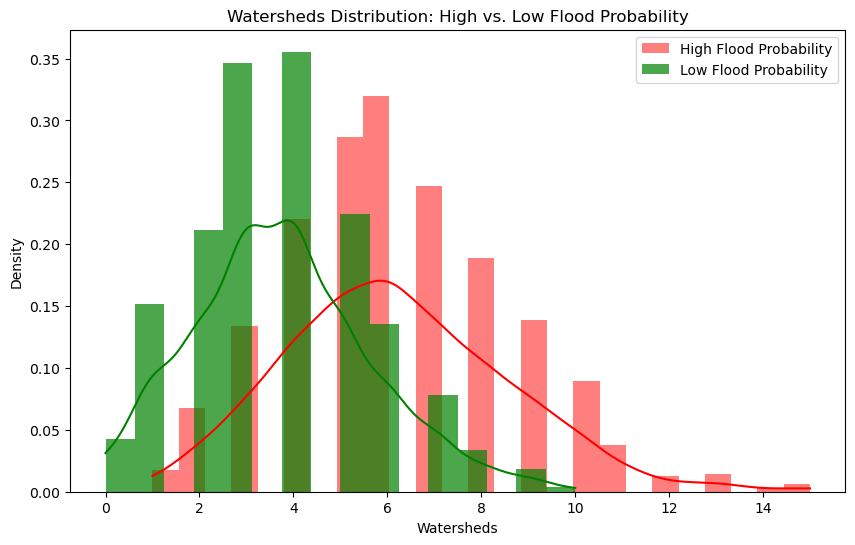

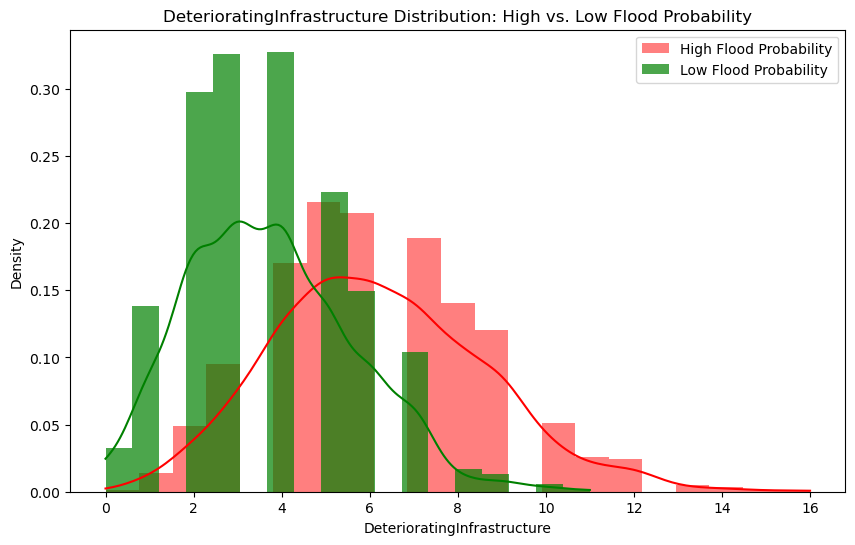

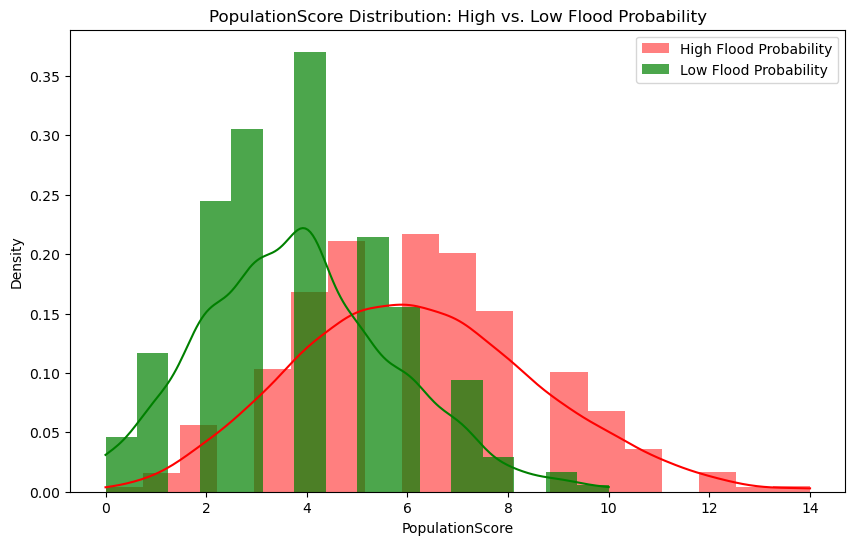

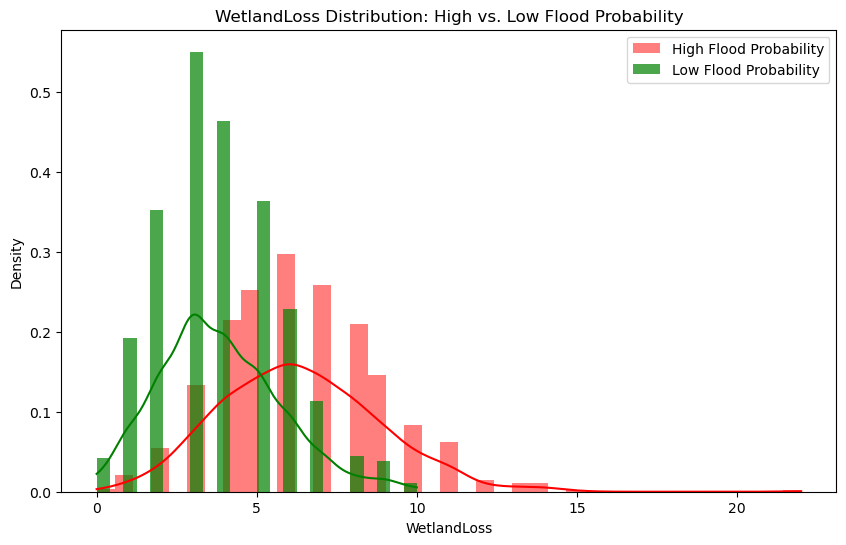

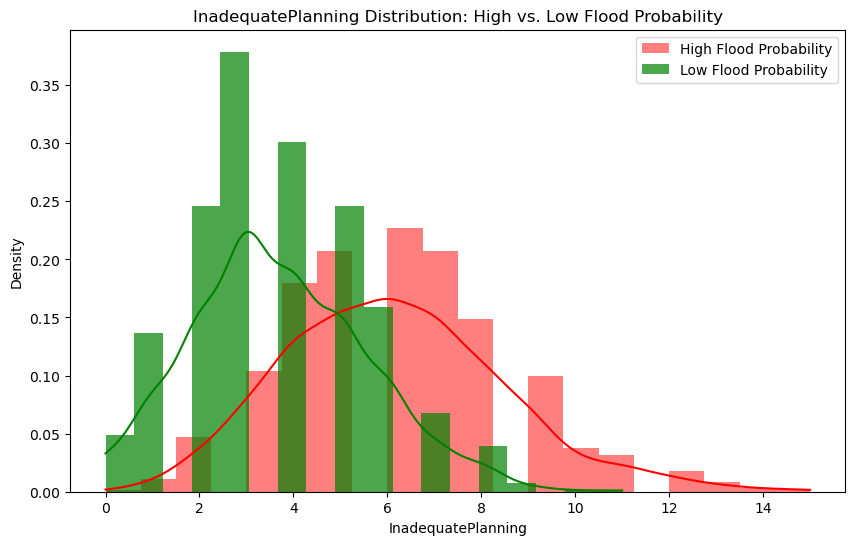

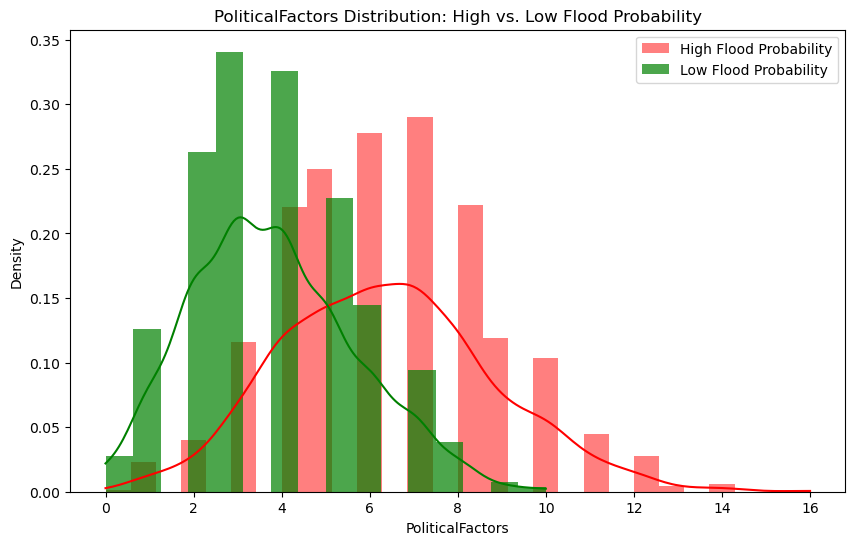

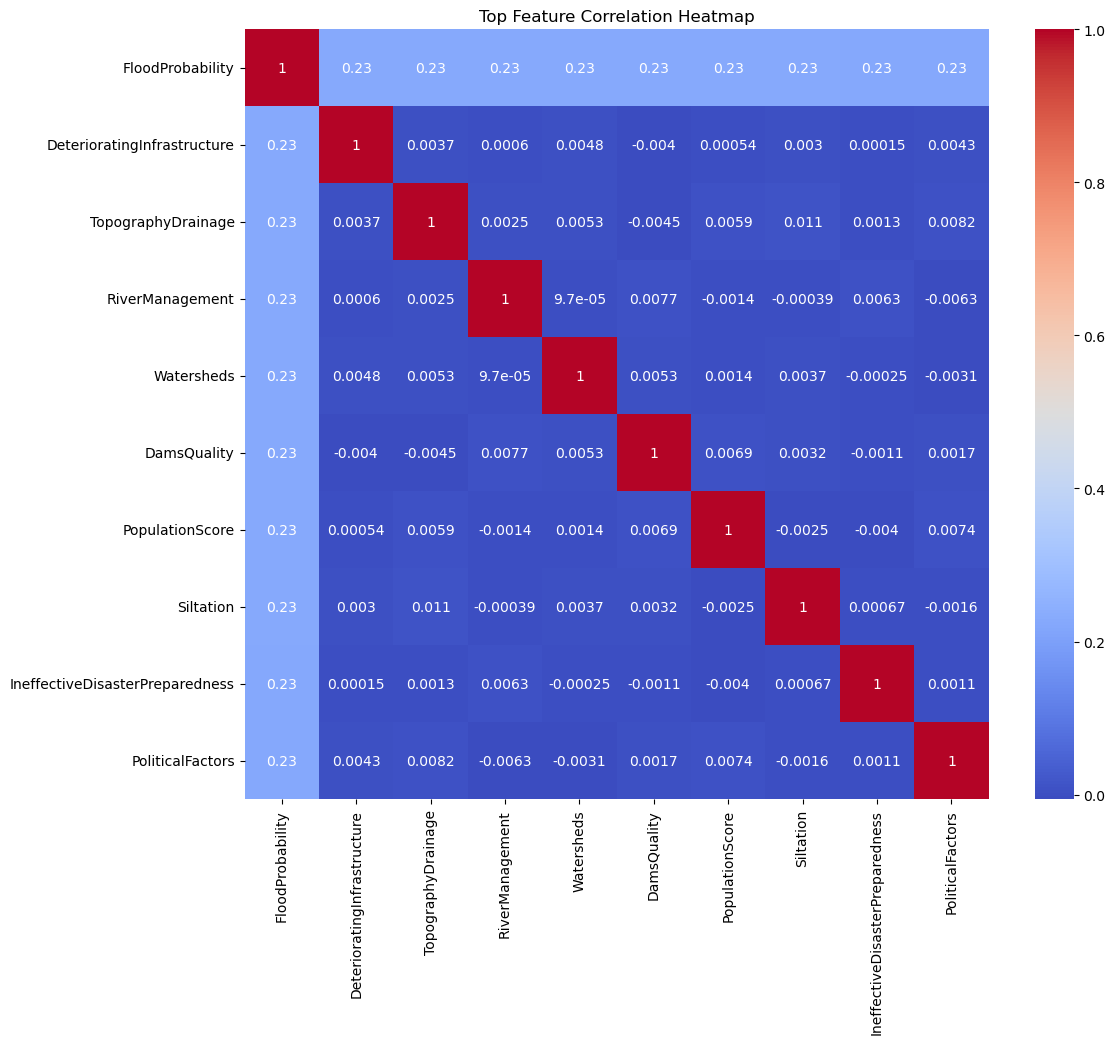

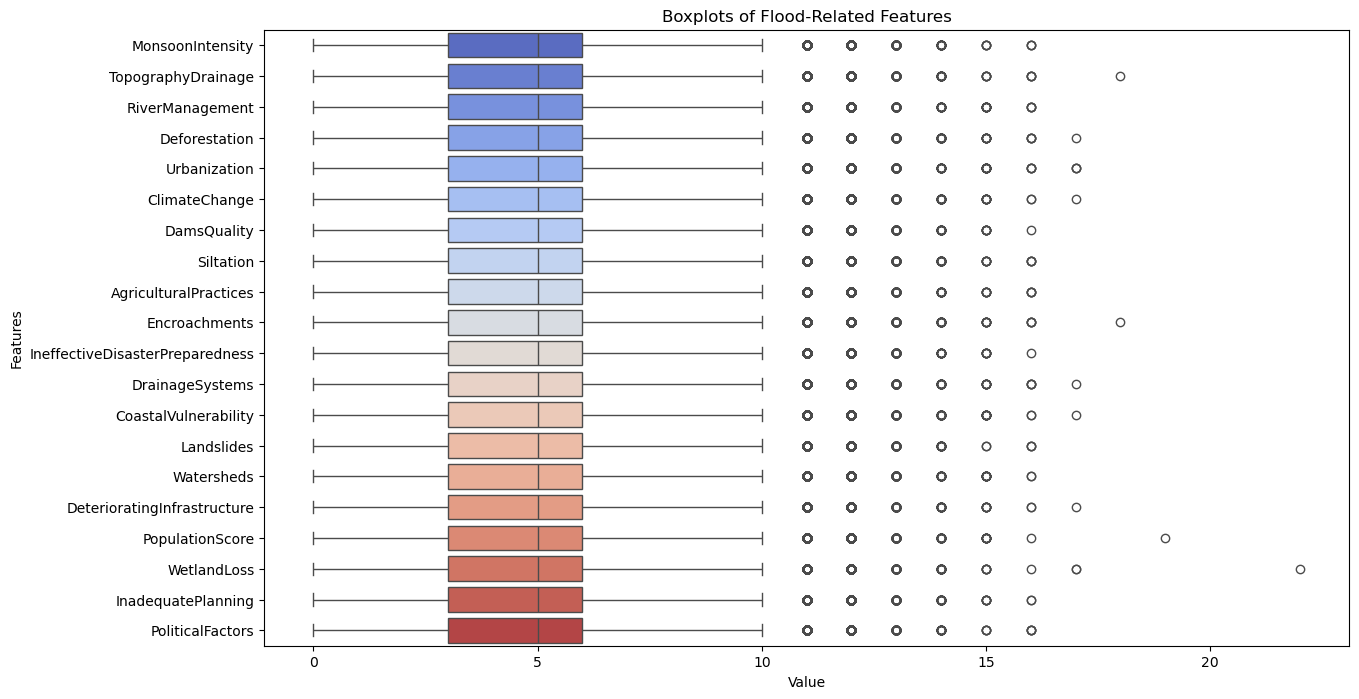

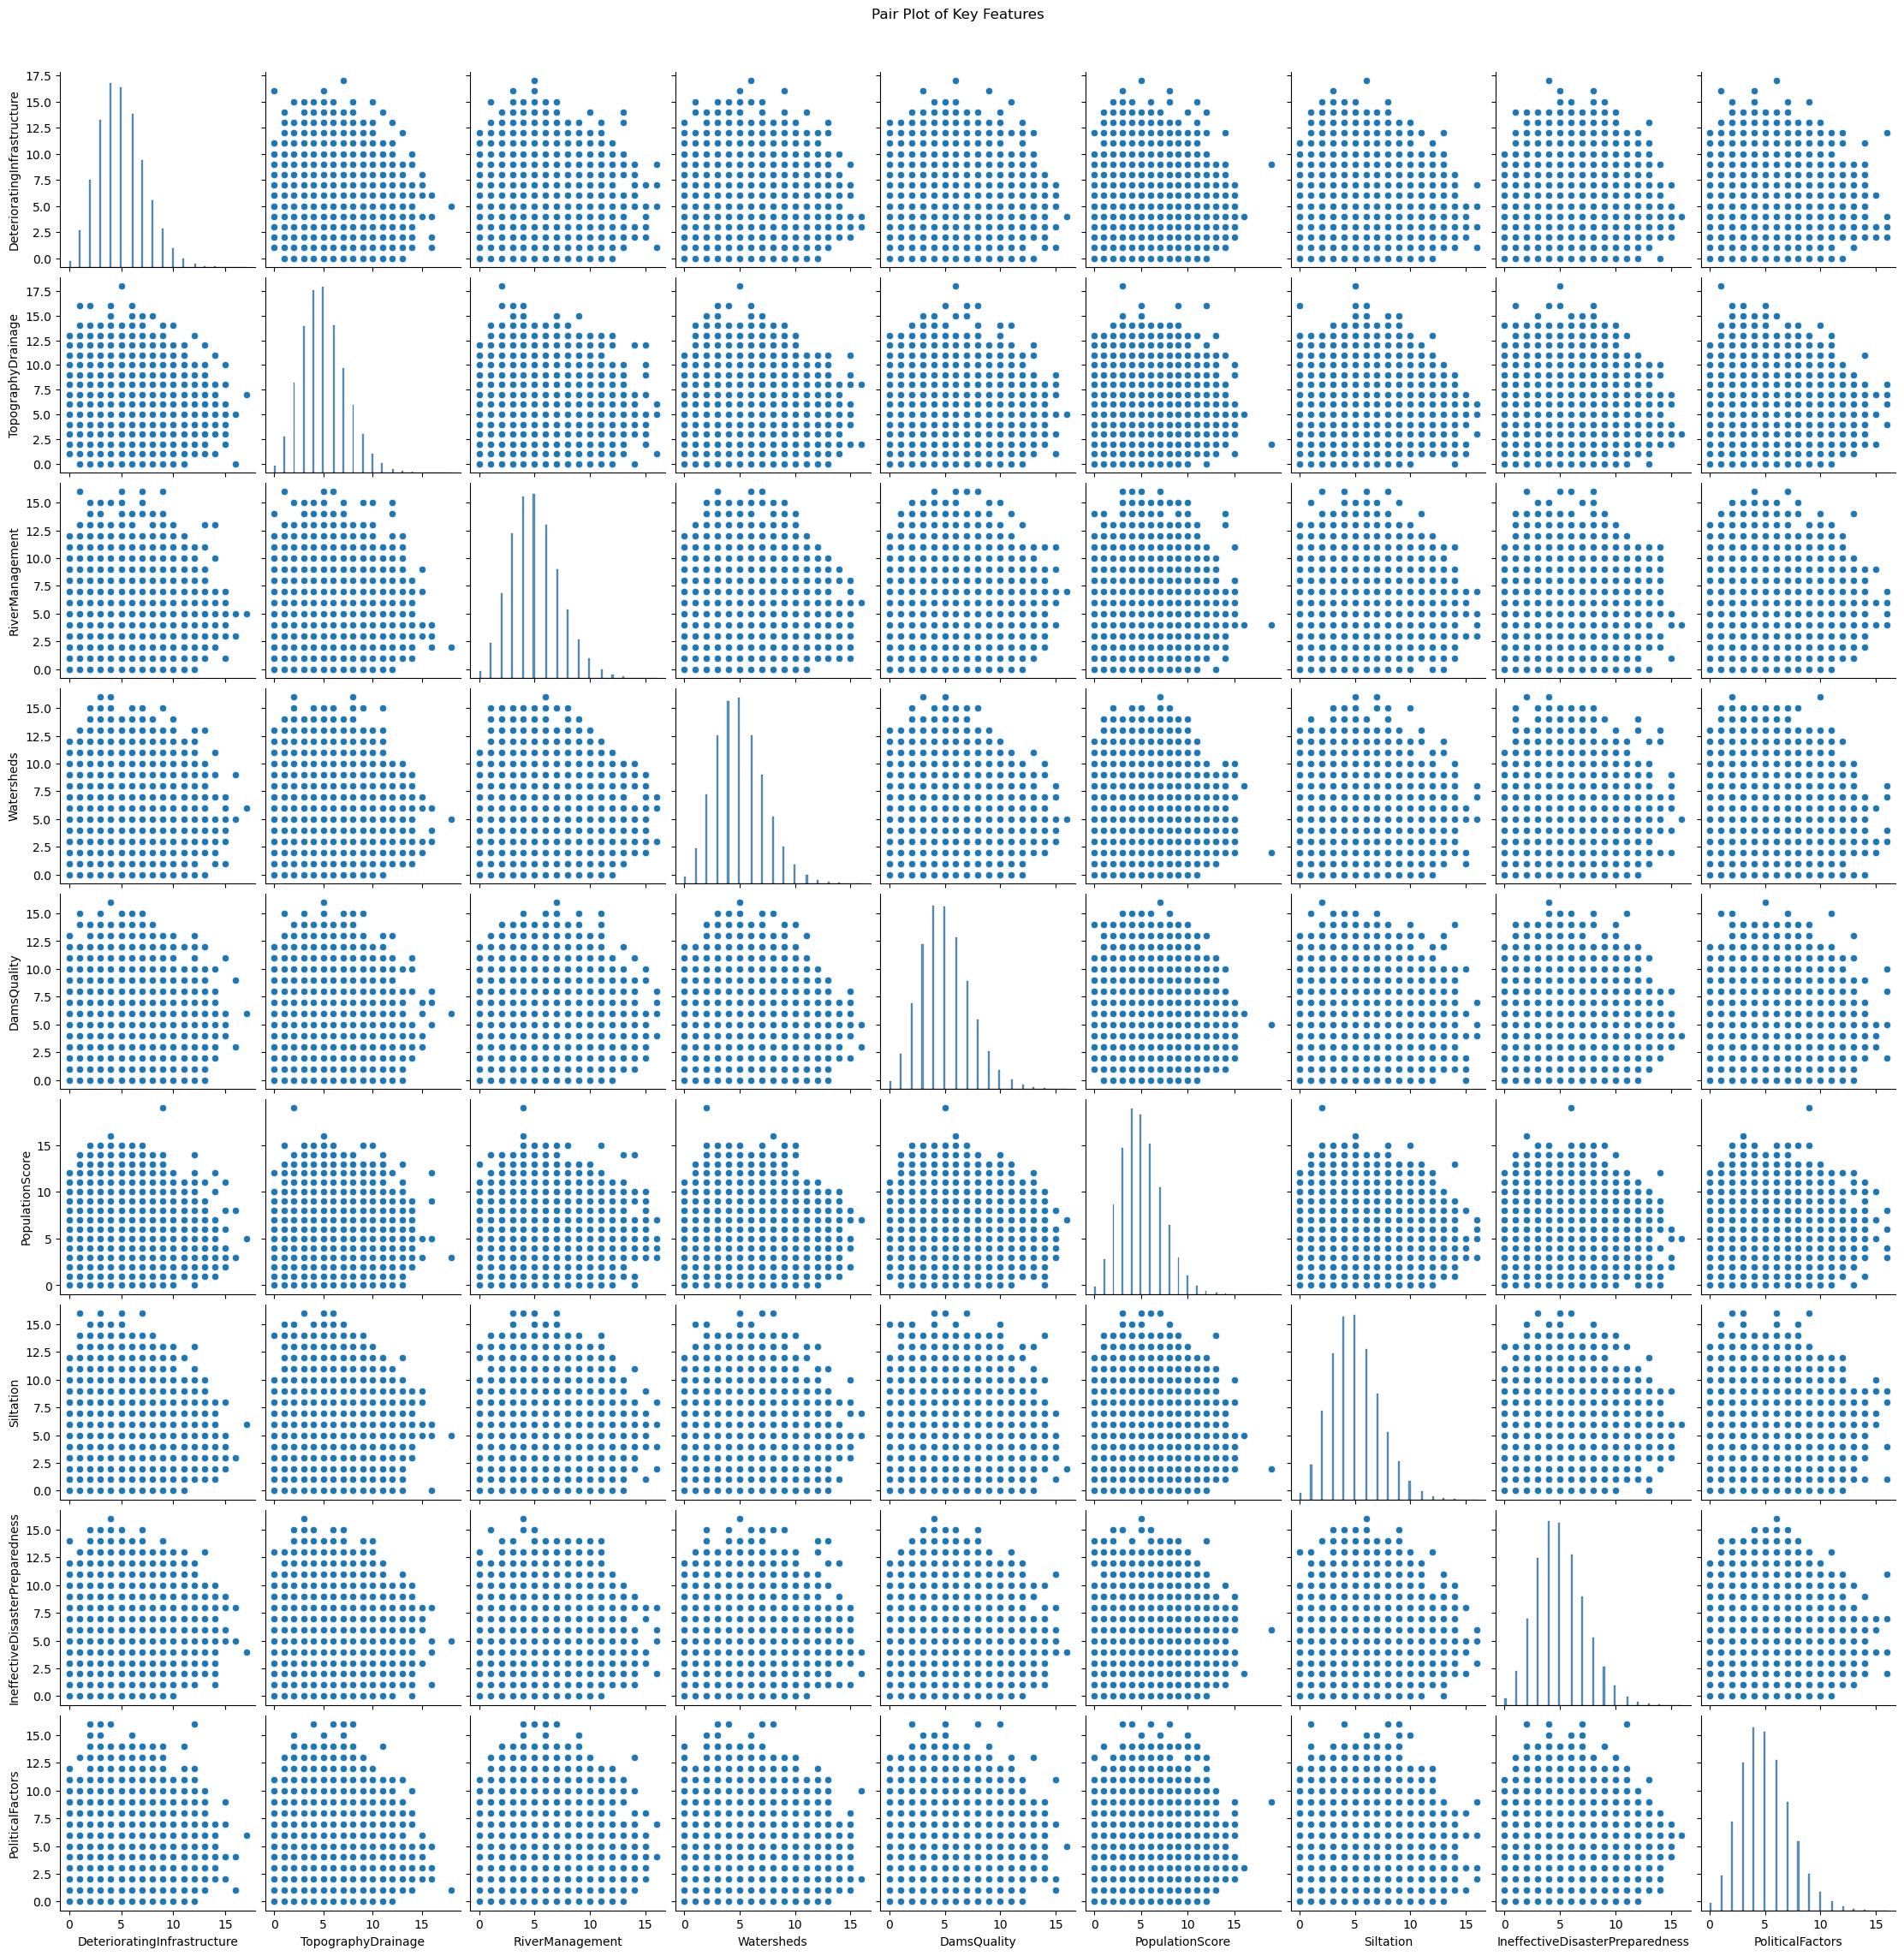

Statistical Description of Dataset:
        MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
count      50000.000000        50000.000000      50000.00000   50000.000000   
mean           4.991480            4.984100          5.01594       5.008480   
std            2.236834            2.246488          2.23131       2.222743   
min            0.000000            0.000000          0.00000       0.000000   
25%            3.000000            3.000000          3.00000       3.000000   
50%            5.000000            5.000000          5.00000       5.000000   
75%            6.000000            6.000000          6.00000       6.000000   
max           16.000000           18.000000         16.00000      17.000000   

       Urbanization  ClimateChange  DamsQuality     Siltation  \
count  50000.000000   50000.000000  50000.00000  50000.000000   
mean       4.989060       4.988340      5.01536      4.988600   
std        2.243159       2.226761      2.24500      2.2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("/Users/anandhu/Downloads/Final Project/combined_dataset/structured/flood_data.csv")





# Distribution of Flood Probability
plt.figure(figsize=(8, 5))
sns.histplot(df['FloodProbability'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Flood Probability')
plt.xlabel('Flood Probability')
plt.ylabel('Frequency')
plt.show()

# Boxplot for key features
key_features = ["MonsoonIntensity", "ClimateChange", "DamsQuality", "Urbanization"]
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[key_features], orient='h')
plt.title('Boxplot of Key Flood-related Features')
plt.xlabel('Feature Value')
plt.ylabel('Features')
plt.show()



#  Feature distributions comparing low and high flood probabilities
high_risk = df[df['FloodProbability'] > 0.6]
low_risk = df[df['FloodProbability'] < 0.4]

# All numeric features excluding FloodProbability
features = df.select_dtypes(include=['number']).columns.drop('FloodProbability')

# Generate feature distribution plots
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(high_risk[feature], color='red', label='High Flood Probability', kde=True, stat="density", linewidth=0)
    sns.histplot(low_risk[feature], color='green', label='Low Flood Probability', kde=True, stat="density", linewidth=0, alpha=0.7)
    plt.title(f'{feature} Distribution: High vs. Low Flood Probability')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Top correlated features heatmap
plt.figure(figsize=(12, 10))
top_corr_features = df.corr()['FloodProbability'].abs().sort_values(ascending=False).head(10).index
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="coolwarm")
plt.title('Top Feature Correlation Heatmap')
plt.show()




#  Boxplots of Key Features
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[features], orient='h', palette="coolwarm")
plt.title('Boxplots of Flood-Related Features')
plt.xlabel('Value')
plt.ylabel('Features')
plt.show()

#  Pair Plot of Selected Key Features
key_features = top_corr_features.drop('FloodProbability')
sns.pairplot(df[key_features])
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()

# Statistical Descriptions
stats_description = df.describe()
print("Statistical Description of Dataset:\n", stats_description)


# Statistical Counts of High and Low Flood Probability Cases
num_high_risk_cases = high_risk.shape[0]
num_low_risk_cases = low_risk.shape[0]
total_cases = df.shape[0]
num_features = len(features)

print(f"\nNumber of Features: {num_features}")
print(f"Total Number of Cases: {total_cases}")
print(f"High Flood Probability Cases (>0.6): {num_high_risk_cases}")
print(f"Low Flood Probability Cases (<0.4): {num_low_risk_cases}")